# Project Background

 JB Music Therapy is a team of Certified Music Therapists who collaborate, design, and personalize therapy with their clients that will foster desired change: boost mood, decrease stress, strengthen relationships, increase focus, develop learning, reduce anxiety, rehab after an injury, and recover lost memories. JB Music Therapy is the largest employer of Music Therapists in Canada. 


A survey was conducted to assess the impact of music on people's mental health and mood in general. The survey recorded responses from over 700 participants and includes details like musical preferences, listening habits, and overall state of mind. Respondents were given 16 genres of music for which they ranked the frequency of listening to each. The responses ranged from never, to very frequently. Moreover, the respondents also ranked the intensity of their feelings of anxiety, depression, insomnia, and OCD on a scale of 1 to 10. 0 being the lowest in intensity to 10 being the highest.

# Objectives
1. Data Cleaning and Processing: Clean and prepare the data in the attached file in the Assignment section for analysis.

2. Data Visualization: Visualize the data to make it easy to understand.

3. Data Reporting: Use the insights and correlations within the data to make recommendations.

In [19]:
# Importing the requried libraries

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [21]:
data = pd.read_csv(r"C:\Users\chris\Downloads\Music_and_Therapy-_Survey - Music_and_Therapy-_Survey.csv")

In [22]:
data.head(5)

,Date,Time,Age,Age-category,Primary Streaming Service,Hours per day,While working,Fav Genre,Foreign languages,Timestamp,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/28/2022,7:38,89,old,YouTube Music,2.0,Yes,Hip hop,Yes,No,...,Very frequently,Very frequently,Very frequently,Rarely,10,10,10,10,Improve,I understand.
1,8/28/2022,7:37,80,old,Spotify,5.0,Yes,Classical,No,Yes,...,Never,Never,Never,Sometimes,10,10,10,10,Improve,I understand.
2,8/28/2022,7:36,74,old,Other streaming service,6.0,Yes,Rap,No,No,...,Sometimes,Sometimes,Rarely,Rarely,10,10,10,10,Improve,I understand.
3,8/28/2022,7:35,73,old,Spotify,1.0,Yes,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,10,10,10,10,Improve,I understand.
4,8/28/2022,7:34,72,old,Spotify,2.0,Yes,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,10,10,10,10,Improve,I understand.


# Data Cleaning

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          723 non-null    object 
 1   Time                          723 non-null    object 
 2   Age                           723 non-null    int64  
 3   Age-category                  723 non-null    object 
 4   Primary Streaming Service     723 non-null    object 
 5   Hours per day                 723 non-null    float64
 6   While working                 722 non-null    object 
 7   Fav Genre                     723 non-null    object 
 8   Foreign languages             720 non-null    object 
 9   Timestamp                     720 non-null    object 
 10  Timestamp.1                   723 non-null    object 
 11  Exploratory                   723 non-null    object 
 12  BPM                           621 non-null    float64
 13  Frequ

In [37]:
# Merging date & time column into one

In [25]:
data['date'] = data['Date'] +" " + data['Time']

In [26]:
data['date']

0      8/28/2022 7:38
1      8/28/2022 7:37
2      8/28/2022 7:36
3      8/28/2022 7:35
4      8/28/2022 7:34
            ...      
718    8/27/2022 9:38
719    8/27/2022 9:39
720    8/27/2022 9:40
721    8/27/2022 9:31
722    8/27/2022 9:32
Name: date, Length: 723, dtype: object

In [35]:
#Converting Date column datatype to datetime

In [28]:
data['date'] = pd.to_datetime(data['date'])

In [30]:
data.drop(columns=['Date','Time'],inplace=True)

In [31]:
data.head(1)

,Age,Age-category,Primary Streaming Service,Hours per day,While working,Fav Genre,Foreign languages,Timestamp,Timestamp.1,Exploratory,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,date
0,89,old,YouTube Music,2.0,Yes,Hip hop,Yes,No,No,Yes,...,Very frequently,Very frequently,Rarely,10,10,10,10,Improve,I understand.,2022-08-28 07:38:00


In [33]:
cols = list(data.columns)
cols = [cols[-1]] + cols[:-1]
data = data[cols]

In [45]:
data.rename(columns = {'date':'Date'},inplace=True)

In [46]:
data

,Date,Age,Age-category,Primary Streaming Service,Hours per day,While working,Fav Genre,Foreign languages,Timestamp,Timestamp.1,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-28 07:38:00,89,old,YouTube Music,2.0,Yes,Hip hop,Yes,No,No,...,Very frequently,Very frequently,Very frequently,Rarely,10,10,10,10,Improve,I understand.
1,2022-08-28 07:37:00,80,old,Spotify,5.0,Yes,Classical,No,Yes,No,...,Never,Never,Never,Sometimes,10,10,10,10,Improve,I understand.
2,2022-08-28 07:36:00,74,old,Other streaming service,6.0,Yes,Rap,No,No,Yes,...,Sometimes,Sometimes,Rarely,Rarely,10,10,10,10,Improve,I understand.
3,2022-08-28 07:35:00,73,old,Spotify,1.0,Yes,Pop,Yes,Yes,No,...,Never,Never,Sometimes,Sometimes,10,10,10,10,Improve,I understand.
4,2022-08-28 07:34:00,72,old,Spotify,2.0,Yes,Rock,Yes,Yes,No,...,Never,Rarely,Very frequently,Never,10,10,10,10,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,2022-08-27 09:38:00,13,child,I do not use a streaming service.,1.0,Yes,R&B,Yes,No,No,...,Sometimes,Rarely,Sometimes,Sometimes,0,0,0,0,Improve,I understand.
719,2022-08-27 09:39:00,13,child,Spotify,3.0,Yes,Country,No,Yes,No,...,Rarely,Never,Rarely,Never,0,0,0,0,No effect,I understand.
720,2022-08-27 09:40:00,13,child,YouTube Music,8.0,Yes,EDM,No,No,No,...,Rarely,Sometimes,Rarely,Rarely,0,0,0,0,Improve,I understand.
721,2022-08-27 09:31:00,12,child,Spotify,4.0,No,Video game music,Yes,No,No,...,Never,Rarely,Rarely,Very frequently,0,0,0,0,No effect,I understand.


In [47]:
# Checking for null values

In [48]:
data.isnull().sum()

Date                              0
Age                               0
Age-category                      0
Primary Streaming Service         0
Hours per day                     0
While working                     1
Fav Genre                         0
Foreign languages                 3
Timestamp                         3
Timestamp.1                       0
Exploratory                       0
BPM                             102
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]

In [49]:
# Dropping null values

In [50]:
data.dropna(inplace=True)

In [51]:
data.isnull().sum()

Date                            0
Age                             0
Age-category                    0
Primary Streaming Service       0
Hours per day                   0
While working                   0
Fav Genre                       0
Foreign languages               0
Timestamp                       0
Timestamp.1                     0
Exploratory                     0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression    

In [52]:
# Checking for duplicates

In [53]:
data.duplicated().any()

False

In [56]:
respondents_age = data['Age-category'].value_counts()

In [60]:
hours = data['Hours per day'].value_counts().head(10)

In [61]:
fav = data['Fav Genre'].value_counts()

In [63]:
data['Primary Streaming Service'].value_counts()

Spotify                              395
YouTube Music                         72
I do not use a streaming service.     56
Apple Music                           42
Other streaming service               39
Pandora                                9
apple Music                            1
Name: Primary Streaming Service, dtype: int64

In [66]:
# Apple music is repeated twice so replacing it

In [64]:
data['Primary Streaming Service'].replace('apple Music','Apple Music',inplace = True)

In [146]:
streaming = data['Primary Streaming Service'].value_counts()

# Data Visualization

In [119]:
# Hours listened per day

In [187]:
data['Hours per day'].mean()

3.6965798045602605

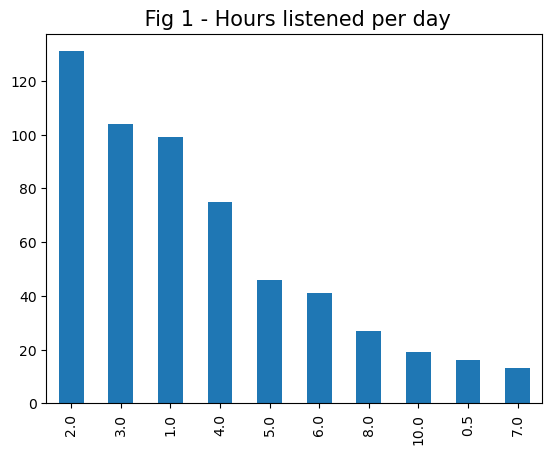

In [180]:
hours.plot(kind='bar')
plt.title(' Fig 1 - Hours listened per day',fontsize=15)
plt.show()

In [120]:
# Age of respondents

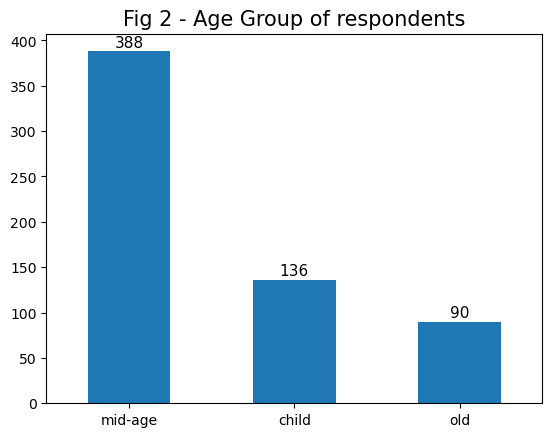

In [186]:
ax=plt.axes()
respondents_age.plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=11) 
plt.title('Fig 2 - Age Group of respondents',fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [135]:
# Most preferred genre

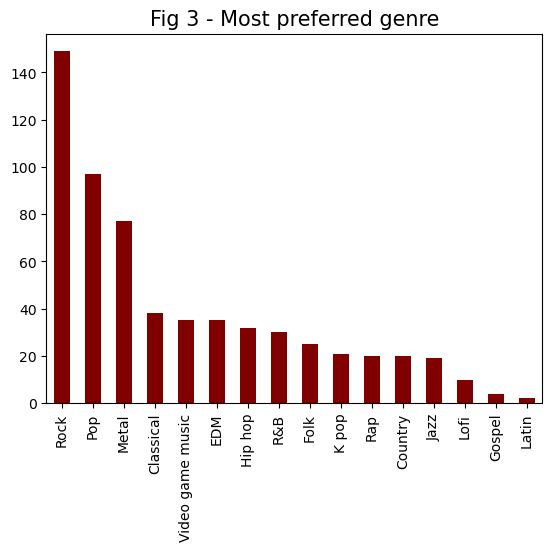

In [188]:
fav.plot(kind='bar',color='maroon')
plt.title('Fig 3 - Most preferred genre',fontsize=15)
plt.show()

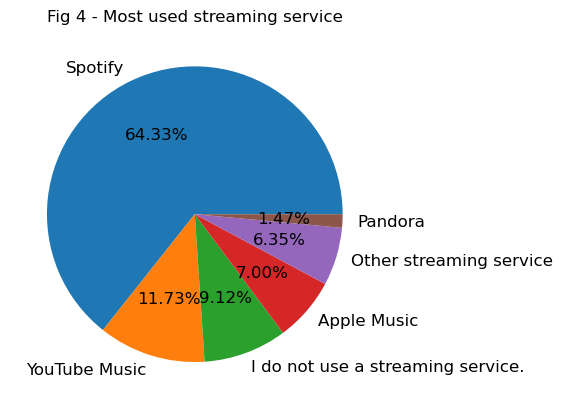

In [183]:
streaming.plot(kind='pie',autopct='%0.2f%%',fontsize=12)
plt.ylabel(None)
plt.title('Fig 4 - Most used streaming service')
plt.show()

In [156]:
data.corr()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,0.042949,0.002240,0.765055,0.814556,0.875200,0.937494
Hours per day,0.042949,1.000000,0.021903,0.008985,0.038714,0.042367,0.046188
BPM,0.002240,0.021903,1.000000,-0.027849,-0.017403,-0.025720,-0.015775
Anxiety,0.765055,0.008985,-0.027849,1.000000,0.976820,0.938315,0.866629
Depression,0.814556,0.038714,-0.017403,0.976820,1.000000,0.973006,0.917419
Insomnia,0.875200,0.042367,-0.025720,0.938315,0.973006,1.000000,0.970252
OCD,0.937494,0.046188,-0.015775,0.866629,0.917419,0.970252,1.000000


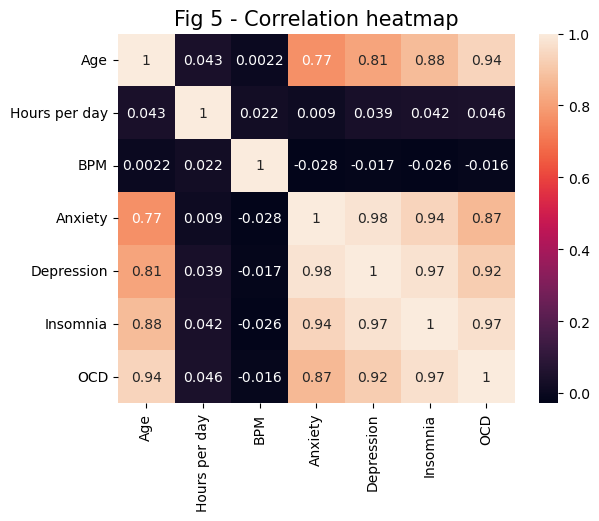

In [185]:
sns.heatmap(data.corr(),annot=True)
plt.title('Fig 5 - Correlation heatmap',fontsize=15)
plt.show()

In [171]:
# Age v OCD

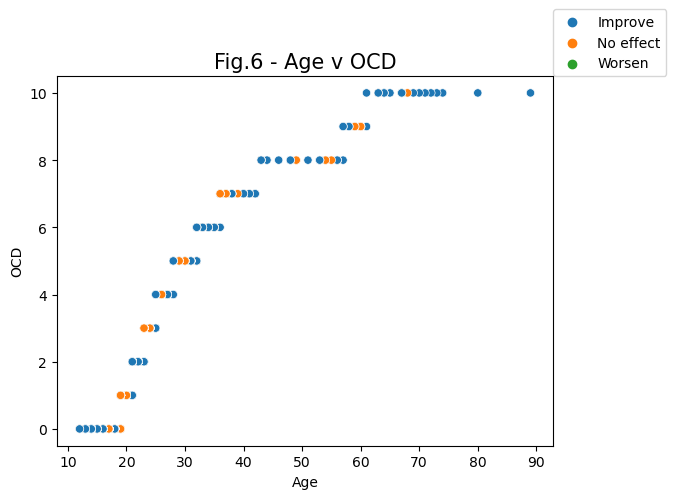

In [170]:
sns.scatterplot(x='Age',y='OCD',hue='Music effects',data=data)
plt.title('Fig.6 - Age v OCD',fontsize=15)
plt.legend(loc=(1,1))
plt.show()

In [172]:
# Depression v Insomnia

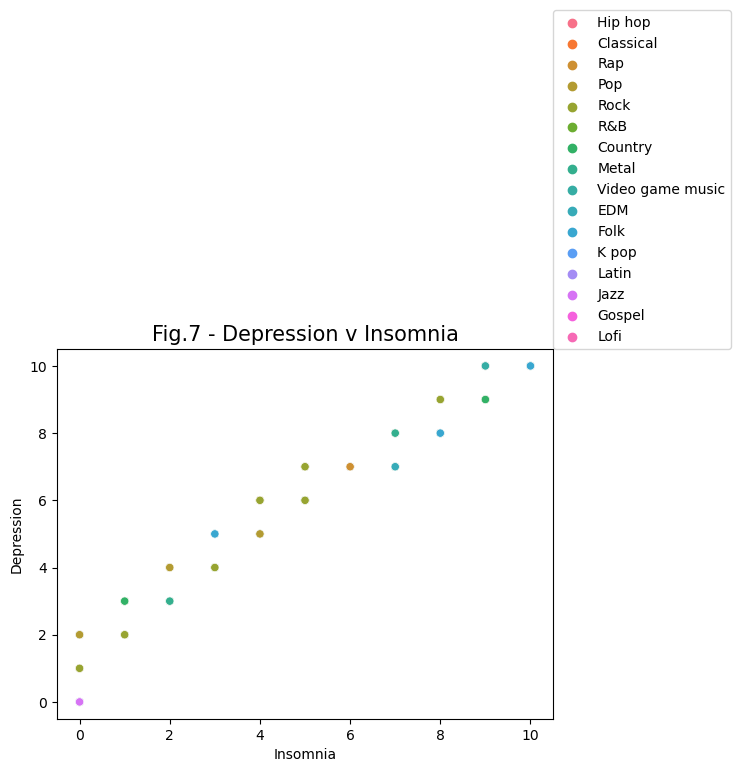

In [174]:
sns.scatterplot(x='Insomnia',y='Depression',hue='Fav Genre',data=data)
plt.title('Fig.7 - Depression v Insomnia',fontsize=15)
plt.legend(loc=(1,1))
plt.show()

In [175]:
# Anxiety v Depression

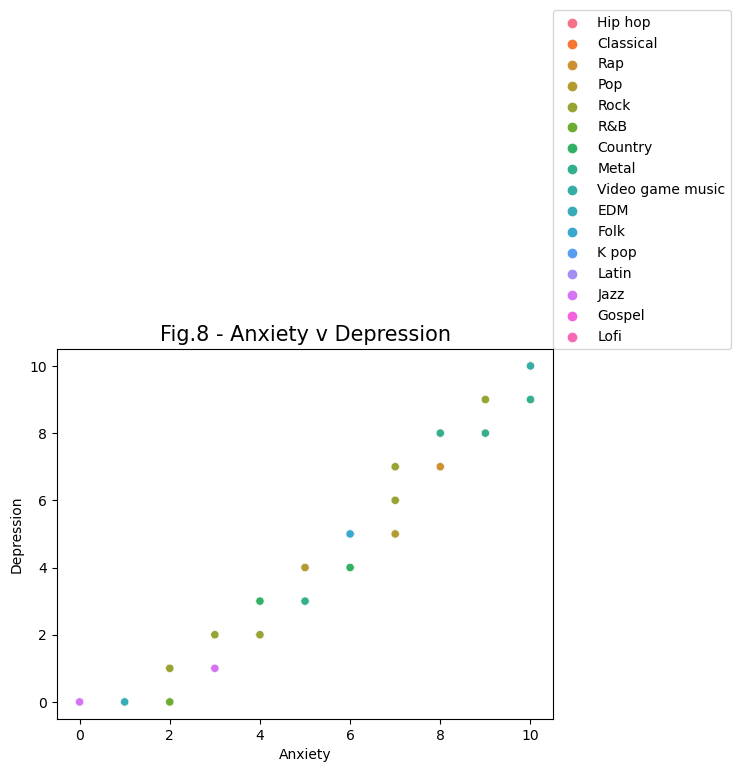

In [176]:
sns.scatterplot(x='Anxiety',y='Depression',hue='Fav Genre',data=data)
plt.title('Fig.8 - Anxiety v Depression',fontsize=15)
plt.legend(loc=(1,1))
plt.show()

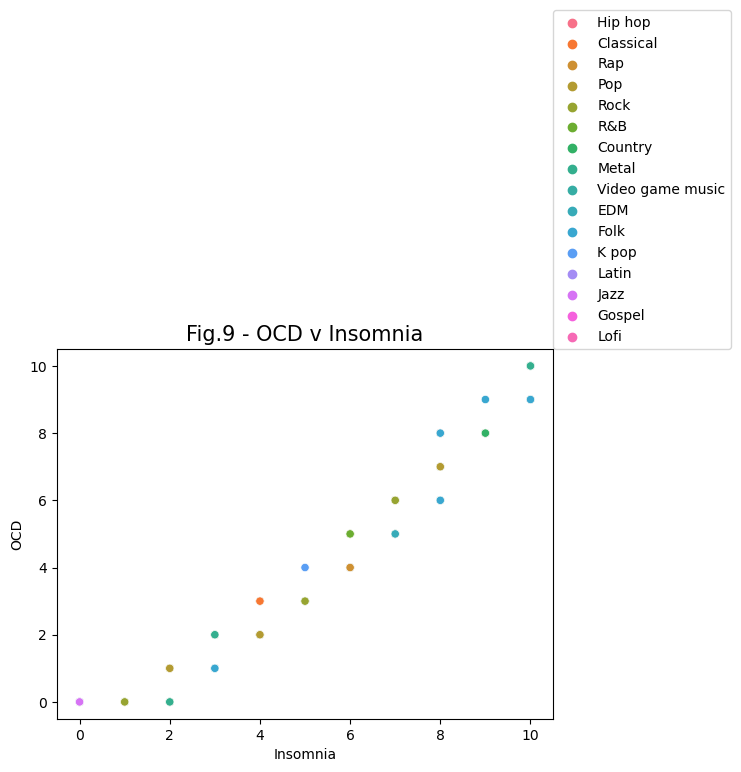

In [178]:
sns.scatterplot(x='Insomnia',y='OCD',hue='Fav Genre',data=data)
plt.title('Fig.9 - OCD v Insomnia',fontsize=15)
plt.legend(loc=(1,1))
plt.show()

# Findings / Insights

With the help of the visualizations here are some insights:
- In Fig 1 , Majority of the respondents listen to music for 2hrs per day and the average of all respondents being 3.6h / day
- In Fig 2 , Majority of the respondents belong to mid-age group - 388 followed by childern - 136 and old - 90.
- In Fig 3, Rock is the most preferred / listened to  genre followed by pop and metal and the least listened to / preferred genre is gospel and latin.
- Fig 4 , More than half of the respondents use Spotify - 64.33% while the least used streaming service is Pandora - 1.64%
- Fig 5 displays a correlation heatmap where we can see that there is a strong correlation between Age, OCD , Anxiety , Insomnia & Depression. The following figures are scatter plots to understand this correlation better
- Fig 6 - Age v OCD - This scatter plot tells us that:
  - OCD level increases when age increases
  - Music has an improved effect on most respondents at every age level and ocd
- Fig 7 - Depression v Insomnia - This scatter plot tells us that:
  - Respondents with high levels of depression and insmonia listen to Folk music & EDM
- Fig 8 - Depression v Anxiety - This scatter plot tells us that:
  - Respondents with high levels of depression and anxiety listen to EDM
- Fig 9 - OCD v Insomnia - This scatter plot tells us that:
  - Respondents with high levels of depression and anxiety listen to EDM
